In [1]:
import sys
import shutil
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
from astropy.cosmology import Planck15

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
work_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/LimitPlot//'
plots_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/'
data_dir = work_dir + 'data/'

In [3]:
data_file_names =[ data_dir + f for f in ['stath_max-lim.dat','stath_min-lim.dat','statp_q16-lim.dat','statp_q84-lim.dat',
                  'Jcm_q16-lim.dat','Jcm_q84-lim.dat','GCE.dat','FermiDwarf.dat','nominal-data.dat','gce-abazajian.dat',
                                         'gce-calore.dat','gce-gordon.dat','thermal-relic.dat'  ] ]

data_files = [np.loadtxt(f) for f in data_file_names]


In [4]:
####Poisson error bands
massP = 10**data_files[2][::,0]
Lim16 = 10**data_files[2][::,1]
Lim84 = 10**data_files[3][::,1]
LimP_disp = (np.log10(Lim84) - np.log10(Lim16))/2.0

####Halo Stat error bands
massH = 10**data_files[4][::,0]
LimH16 = 10**data_files[4][::,1]
LimH84 = 10**data_files[5][::,1]
LimH_disp = (np.log10(LimH84) - np.log10(LimH16))/2.0


#####Combine the uncertainties
Lim_uncert = np.sqrt(LimP_disp**2 + LimH_disp**2)

###GCE
GCE = data_files[6]
GCE_ab = data_files[9]
GCE_calore = data_files[10]
GCE_gordan = data_files[11]

###Fermi Dwarf
massD = 10**data_files[8][::,0]
LimD = 10**data_files[8][::,1]

#####thermal
thermal = 10**data_files[12]

###Cross Corr
mDM_ary = [10,20,50,100,200,300,400,500,700,1000,10000]
lim_ary = np.array(np.array([[  3.47613312e-25,   3.19993932e-25,   4.09432255e-25,
          5.74111275e-25,   8.19273323e-25,   1.11412925e-24,
          1.54077804e-24,   1.88342427e-24,   2.45742289e-24,
          3.51413849e-24,   1.88285952e-23],
       [  6.84653178e-25,   6.11339438e-25,   8.88586835e-25,
          1.46856813e-24,   2.37706561e-24,   3.06228027e-24,
          3.78778553e-24,   4.28537842e-24,   5.06539081e-24,
          6.20444331e-24,   3.37611100e-23]]))


In [5]:
ab_mean = GCE_ab[0]
ab_up = GCE_ab[-1,1]
ab_low = GCE_ab[1,1]
ab_L = GCE_ab[3,0]
ab_R = GCE_ab[2,0]

In [6]:
# plot_data_skylocs = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs',
#                         elephant=False, 
#                         nmc=200,
#                         bcut=20,
#                         nonoverlap=True,
#                         nonoverlapradius=2.,
#                         halos_ran=800, 
#                         halos_to_keep=800,
#                         data_type="skylocs")

In [7]:
# data_skylocs_ary, _ = plot_data_skylocs.return_limits()

In [8]:
# np.save("data_skylocs_ary",data_skylocs_ary)

In [9]:
data_skylocs_ary = np.load("data_skylocs_ary.npy")

In [24]:
plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=True,
                        xsecslim=5,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [25]:
data_ary, _ = plot_data.return_limits()

In [26]:
# plot_data_nb = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully/////',
#                         elephant=False, 
#                         nmc=1,
#                         bcut=20,
#                         nonoverlap=True,
#                         nonoverlapradius=2.,
#                         cut_0p5=True,
#                         xsecslim=5,
#                         halos_ran=1000, 
#                         halos_to_keep=1000,
#                         data_type="data",
#                         catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSTully_ALL_DATAPAPER_Planck15_v5.csv",
#                         file_prefix='LL2_TSmx_lim_b_nb_o')

In [27]:
# data_ary_nb, _ = plot_data_nb.return_limits()

In [22]:
plot_h = 10/1.2
plot_w = 8/1.2

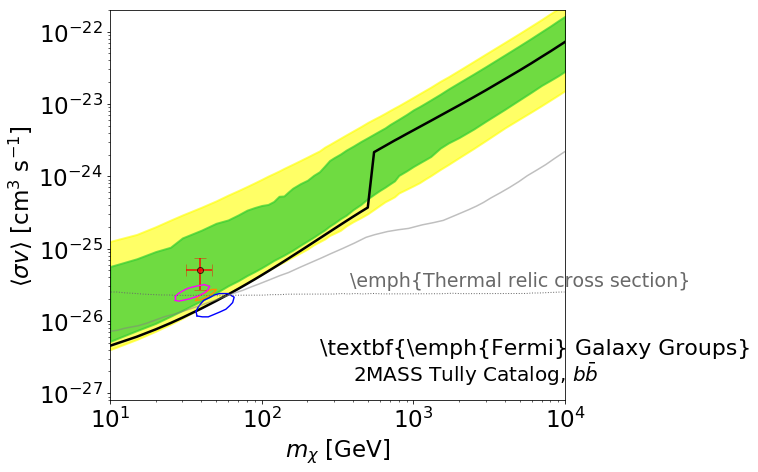

In [23]:
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[-1], 2.5, axis=1),10**np.percentile(data_skylocs_ary[-1], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[-1], 16, axis=1),10**np.percentile(data_skylocs_ary[-1], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Galaxy groups (this work)',lw=2.5)
# plt.plot(plot_data.marr,10**np.percentile(data_ary_nb[-1], 2.5, axis=1), alpha=1, color='k',ls='--',label=r'Galaxy groups (no boost)',lw=2.5)


plt.plot(10**GCE[::,0],10**GCE[::,1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE[[0,-1],0],10**GCE[[0,-1],1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE_calore[::,0],10**GCE_calore[::,1],color='blue',alpha = 1.0,lw=1.4) #label = r'Daylan et. al. 2014 (2$\sigma$)',alpha=0.5)
plt.plot(10**GCE_calore[[0,-1],0],10**GCE_calore[[0,-1],1],color='blue',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[::,0],10**GCE_gordan[::,1],color='magenta',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[[0,-1],0],10**GCE_gordan[[0,-1],1],color='magenta',alpha = 1.0,lw=1.4)
plt.errorbar([10**ab_mean[0]],[10**ab_mean[1]],yerr = [ np.array([10**ab_mean[1] - 10**ab_low]), np.array([10**ab_up - 10**ab_mean[1] ]) ],
            xerr = [ np.array([10**ab_mean[0] - 10**ab_L]), np.array([10**ab_R - 10**ab_mean[0] ]) ],color='red',
            linewidth=2.0, capsize=6,capthick=.6,markersize=6,marker='o',alpha=0.7,mec='k')

plt.plot(massD,LimD,color='grey',label = r'$\mathit{Fermi}$ dwarfs (2016)',alpha=0.5)

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)

# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0],handles[4], handles[3],handles[1],handles[2]] #, handles[2]]
# labels = [labels[0], handles[1],labels[4],labels[3],labels[2]] #, labels[2]]

# labels = [u'Galaxy groups (this work)',
#  u'95\\% containment',
#  u'68\\% containment',
#           u'Galaxy groups, no boost',
#  u'$\\mathit{Fermi}$ dwarfs (2016)']

# leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none',frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(400.3, 1.5e-27, r'2MASS Tully Catalog, $b\bar b$',fontsize=20,color='black')
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')

plt.tight_layout()

In [852]:
plot_data_channels = []

for channel in tqdm_notebook(['q','e','c','t','W','Z','mu','tau']):
# for channel in tqdm_notebook(['tau']):

    channel_str = channel

    plot_data_temp = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_'+channel+'/////',
                            elephant=False, 
                            nmc=1,
                            bcut=20,
                            nonoverlap=True,
                            nonoverlapradius=2.,
                            cut_0p5=True,
                            xsecslim=5,
                            halos_ran=100, 
                            halos_to_keep=100,
                            data_type="data",
                            catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSTully_ALL_DATAPAPER_Planck15_v5.csv",
                            file_prefix=r'LL2_TSmx_lim_'+channel_str+r'_o')

    plot_data_channels.append(plot_data_temp)

In [853]:
data_ary_channels = []

for i in range(len(tqdm_notebook(plot_data_channels))):
    data_ary_channels.append(plot_data_channels[i].return_limits())

In [854]:
plot_colors = ["forestgreen","cornflowerblue","firebrick","goldenrod","grey","cornflowerblue","goldenrod","lightcoral"]
plot_ls = ["solid","solid","dashed","solid","solid","dashed","dashed","solid"]

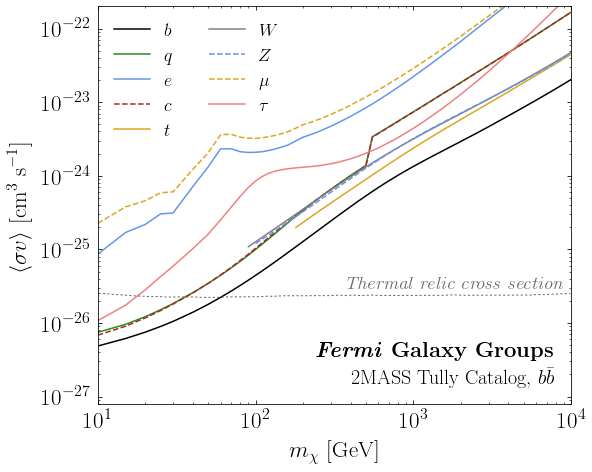

In [855]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'$b$')



for i, label in enumerate((['q','e','c','t','W','Z','mu','tau'])):
    if label in ["mu","tau"]:
        label = "\\" + label
    label = "$" + label + "$"    
    plt.plot(plot_data.marr,[None if v == 1.0 else v for v in 10**np.percentile(data_ary_channels[i][0][-1], 16, axis=1)], label=label, color=plot_colors[i],ls=plot_ls[i])

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(400.3, 1.5e-27, r'2MASS Tully Catalog, $b\bar b$',fontsize=20,color='black')

plt.legend(ncol=2,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

# plt.savefig(plots_dir + 'stacked_limit-TS5-ps-mask-v4.pdf',bbox_inches='tight')


